In [ ]:
from os import chdir
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
chdir("/content/drive/MyDrive/Projet")

Mounted at /content/drive


In [ ]:
import random
import numpy as np
import pandas as pd
import torchvision.models as models
from PIL import Image

In [ ]:
# Load captions
PATH = "flickr8k/Images/"
captions = pd.read_csv("flickr8k/captions.txt")
captions

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [ ]:
# Add <start> and <end> tags
captions.caption = captions.caption.apply(lambda x: f"<start> {x} <end>")
captions

,image,caption
0,1000268201_693b08cb0e.jpg,<start> A child in a pink dress is climbing up...
1,1000268201_693b08cb0e.jpg,<start> A girl going into a wooden building . ...
2,1000268201_693b08cb0e.jpg,<start> A little girl climbing into a wooden p...
3,1000268201_693b08cb0e.jpg,<start> A little girl climbing the stairs to h...
4,1000268201_693b08cb0e.jpg,<start> A little girl in a pink dress going in...
...,...,...
40450,997722733_0cb5439472.jpg,<start> A man in a pink shirt climbs a rock fa...
40451,997722733_0cb5439472.jpg,<start> A man is rock climbing high in the air...
40452,997722733_0cb5439472.jpg,<start> A person in a red shirt climbing up a ...
40453,997722733_0cb5439472.jpg,<start> A rock climber in a red shirt . <end>


In [ ]:
# Shuffle images
images = captions.image.unique()
random.shuffle(images)
images

array(['3344948183_5b89379585.jpg', '2072574835_febf0c5fb9.jpg',
       '236730743_0d4fd8de5a.jpg', ..., '1525153022_06c48dbe52.jpg',
       '173020287_230bfc4ffc.jpg', '3401437960_7da856e004.jpg'],
      dtype=object)

In [ ]:
# Select a subset of images for training
N = 1000

train_images = images[:N]

In [ ]:
train_data = captions.loc[captions.image.isin(train_images)].reset_index(drop=True)
train_data

,image,caption
0,1019077836_6fc9b15408.jpg,<start> A brown dog chases the water from a sp...
1,1019077836_6fc9b15408.jpg,<start> a brown dog plays with the hose . <end>
2,1019077836_6fc9b15408.jpg,<start> A brown dog running on a lawn near a g...
3,1019077836_6fc9b15408.jpg,<start> A dog is playing with a hose . <end>
4,1019077836_6fc9b15408.jpg,<start> Large brown dog running away from the ...
...,...,...
4995,987907964_5a06a63609.jpg,<start> one brown and white dog chasing a blac...
4996,987907964_5a06a63609.jpg,<start> The two dogs are running through the g...
4997,987907964_5a06a63609.jpg,<start> Two cocker spaniels running through th...
4998,987907964_5a06a63609.jpg,<start> Two dogs are running through a green y...


<start> A brown dog chases the water from a sprinkler on a lawn . <end>


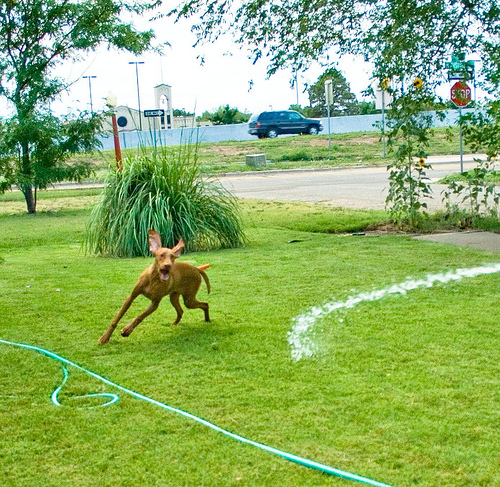

In [ ]:
print(train_data.caption[0])
pic = Image.open(PATH + train_data.image[0])
pic

In [ ]:
def load_image(image_name):
    img = Image.open(PATH + image_name)
    img = img.resize((250, 250))
    img = np.array(img) / 255
    return img

In [ ]:
np.array(pic.resize((250,250))) / 255

array([[[0.96862745, 0.98431373, 0.99607843],
        [0.97254902, 0.98823529, 0.99607843],
        [0.96862745, 0.98431373, 0.98823529],
        ...,
        [0.80784314, 0.89803922, 0.94509804],
        [0.79607843, 0.89019608, 0.94117647],
        [0.79215686, 0.89019608, 0.9372549 ]],

       [[0.97254902, 0.98823529, 0.99607843],
        [0.97647059, 0.98823529, 0.99607843],
        [0.97254902, 0.99215686, 0.99215686],
        ...,
        [0.81960784, 0.90588235, 0.94117647],
        [0.81568627, 0.90588235, 0.94901961],
        [0.80784314, 0.89803922, 0.94509804]],

       [[0.98039216, 0.98431373, 0.98823529],
        [0.98431373, 0.98823529, 0.99215686],
        [0.98431373, 0.99215686, 0.99215686],
        ...,
        [0.83529412, 0.91372549, 0.94117647],
        [0.82745098, 0.90588235, 0.94901961],
        [0.82745098, 0.90588235, 0.94117647]],

       ...,

       [[0.1372549 , 0.15294118, 0.19607843],
        [0.14117647, 0.15686275, 0.2       ],
        [0.14117647, 0

In [ ]:
from os.path import join

from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

In [ ]:
class DatasetLoader(Dataset):
    def __init__(self, img_path, captions_file):
        self.img_path = img_path
        self.df = pd.read_csv(captions_file)
        
        self.imgs = self.df["image"]
        self.captions = self.df["caption"]

        self.transform = transforms.Compose([
            transforms.Resize((250, 250)),
            transforms.ToTensor()                              
        ])
        
    
    def __len__(self):
        return self.df.shape[0]
    
    def __getitem__(self, idx):
        caption = self.captions[idx]
        img_name = self.imgs[idx]
        
        img = Image.open(join(self.img_path, img_name))
        img = self.transform(img)
        
        return img

In [ ]:
dataset = DatasetLoader(img_path="flickr8k/Images/", captions_file="flickr8k/captions.txt")

In [ ]:
data_loader = DataLoader(
    dataset=dataset,
    batch_size=10,
    num_workers=1,
    shuffle=True
)

In [ ]:
data_iter = iter(data_loader)
images = next(data_iter)

In [ ]:
images.shape

torch.Size([10, 3, 250, 250])

VGG

In [ ]:
vgg16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
# Truncate model to get extracted features (before prediction)
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
class VGG16FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()

        model = models.vgg16(pretrained=True)

        # VGG-16 Feature Layers
        self.features = nn.Sequential(*list(model.features))
        # VGG-16 Average Pooling Layer
        self.pooling = model.avgpool
        # First part of fully-connected layer from VGG16
        self.fc = model.classifier[0]

        self.flatten = nn.Flatten()
        
    def forward(self, x):
        out = self.features(x)
        out = self.pooling(out)
        out = self.flatten(out)
        out = self.fc(out) 
        
        return out 

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
new_model = new_model.to(device)

In [ ]:
from tqdm import tqdm
import numpy as np

# Resising
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(250),
    transforms.ToTensor()                              
])

features = []

for i in tqdm(captions.image):
    img = cv2.imread(path)
    img = transform(img)
    # Reshape the image. PyTorch model reads 4-dimensional tensor
    # [batch_size, channels, width, height]
    img = img.reshape(1, 3, 448, 448)
    img = img.to(device)
    # We only extract features, so we don't need gradient
    with torch.no_grad():
        # Extract the feature from the image
        feature = new_model(img)
        # Convert to NumPy Array, Reshape it, and save it to features variable
    features.append(feature.cpu().detach().numpy().reshape(-1))
    
    # Convert to NumPy Array
features = np.array(features)

In [ ]:
np.array(pic).shape

(500, 333, 3)

In [ ]:
# TODO ? normalize with magic numbers or batch norm ? question to prof

(250, 250, 3)